<a href="https://colab.research.google.com/github/sebastianmorales-lab/datauy_MachineLearning/blob/main/Copia_de_ProyectoVinoBlanco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# El conjunto de datos Wine Quality, disponible en la UCI Machine Learning Repository, contiene información fisicoquímica sobre muestras de vino tinto y blanco producidas en Portugal. El objetivo es predecir la calidad del vino a partir de sus características químicas y físicas.



# Este proyecto se basa en encontrar cual es la calidad media de los vinos producidos, teniendo como objetivo principal desarrollar un modelo predictivo  del conjuntos de  datos y  que este nos de un promedio.

# Para comenzar, se importan las bibliotecas necesarias para el análisis de datos y la construcción del modelo de aprendizaje automático. Estas bibliotecas incluyen pandas para la manipulación de datos, seaborn y matplotlib para la visualización, scikit-learn para el modelado y otras herramientas esenciales.


In [ ]:
#importar las librerias


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

# Aquí, se carga el conjunto de datos , que contiene información sobre vinos tintos y blancos.

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/Jnavarro2020/Ejercicio-ML/refs/heads/main/Vino%20Blanco%2CDepurado.csv',sep=';')




# *Se realiza una inspección inicial del conjunto de datos para comprender la estructura y el formato de las columnas. Esto nos permite identificar posibles problemas de datos y realizar las transformaciones necesarias para su correcto procesamiento.*

In [ ]:
df.head()
#Mostramos los graficos de las variables del vino para ver como es su distribución

,Acido fijo,Acido volatil,Acido citrico,azucar residual,Cloruros,Libre dioxido de azufre,dioxido de sulfuro total,densidad,pH,sulfatos,alcohol,Calidad
0,"7,00",0.27,0.36,20.7,0.045,"45,00","170,00","1,00","3,00",0.45,8.8,"6,00"
1,6.3,0.3,0.34,1.6,0.049,"14,00","132,00",0.994,3.3,0.49,9.5,"6,00"
2,8.1,0.28,0.4,6.9,0.050,"30,00","97,00",0.9951,3.26,0.44,10.1,"6,00"
3,7.2,0.23,0.32,8.5,0.058,"47,00","186,00",0.9956,3.19,0.4,9.9,"6,00"
4,7.2,0.23,0.32,8.5,0.058,"47,00","186,00",0.9956,3.19,0.4,9.9,"6,00"


# Se identificó que algunos datos numéricos utilizan comas como separador decimal. Para asegurar la compatibilidad con las bibliotecas de análisis, se realiza una limpieza de datos reemplazando las comas por puntos.



In [ ]:

df = df.replace(',', '.', regex=True)
print(df.dtypes)


Acido fijo                    object
 Acido volatil                object
Acido citrico                 object
azucar residual               object
Cloruros                     float64
Libre dioxido de azufre       object
dioxido de sulfuro total      object
densidad                      object
pH                            object
sulfatos                      object
alcohol                       object
Calidad                       object
dtype: object


In [ ]:
df.head() #Imprimimos el encabezado de los datos para observar los cambios

,Acido fijo,Acido volatil,Acido citrico,azucar residual,Cloruros,Libre dioxido de azufre,dioxido de sulfuro total,densidad,pH,sulfatos,alcohol,Calidad
0,7.00,0.27,0.36,20.7,0.045,45.00,170.00,1.00,3.00,0.45,8.8,6.00
1,6.3,0.3,0.34,1.6,0.049,14.00,132.00,0.994,3.3,0.49,9.5,6.00
2,8.1,0.28,0.4,6.9,0.050,30.00,97.00,0.9951,3.26,0.44,10.1,6.00
3,7.2,0.23,0.32,8.5,0.058,47.00,186.00,0.9956,3.19,0.4,9.9,6.00
4,7.2,0.23,0.32,8.5,0.058,47.00,186.00,0.9956,3.19,0.4,9.9,6.00


# Se detectó que algunas columnas tienen un tipo de dato incorrecto, object. Para poder realizar cálculos numéricos, se convierten estas columnas al tipo de dato float.

In [ ]:


for column in df.select_dtypes(include=['object']).columns:
  df[column] = pd.to_numeric(df[column], errors='coerce').astype('float')




In [ ]:
# Imrpimimos el tipo de datos para confirmar que se cambiaron a tipo float.
df.dtypes

,0
Acido fijo,float64
Acido volatil,float64
Acido citrico,float64
azucar residual,float64
Cloruros,float64
Libre dioxido de azufre,float64
dioxido de sulfuro total,float64
densidad,float64
pH,float64
sulfatos,float64


# *Se calcula la matriz de correlación entre las variables fisicoquímicas del vino y la calidad. Esto nos permite identificar las variables que tienen una mayor influencia en la calidad del vino y seleccionar las más relevantes para el modelo. Finalmente nos decantamos por utilizar todas las variables fisicoquimicas*


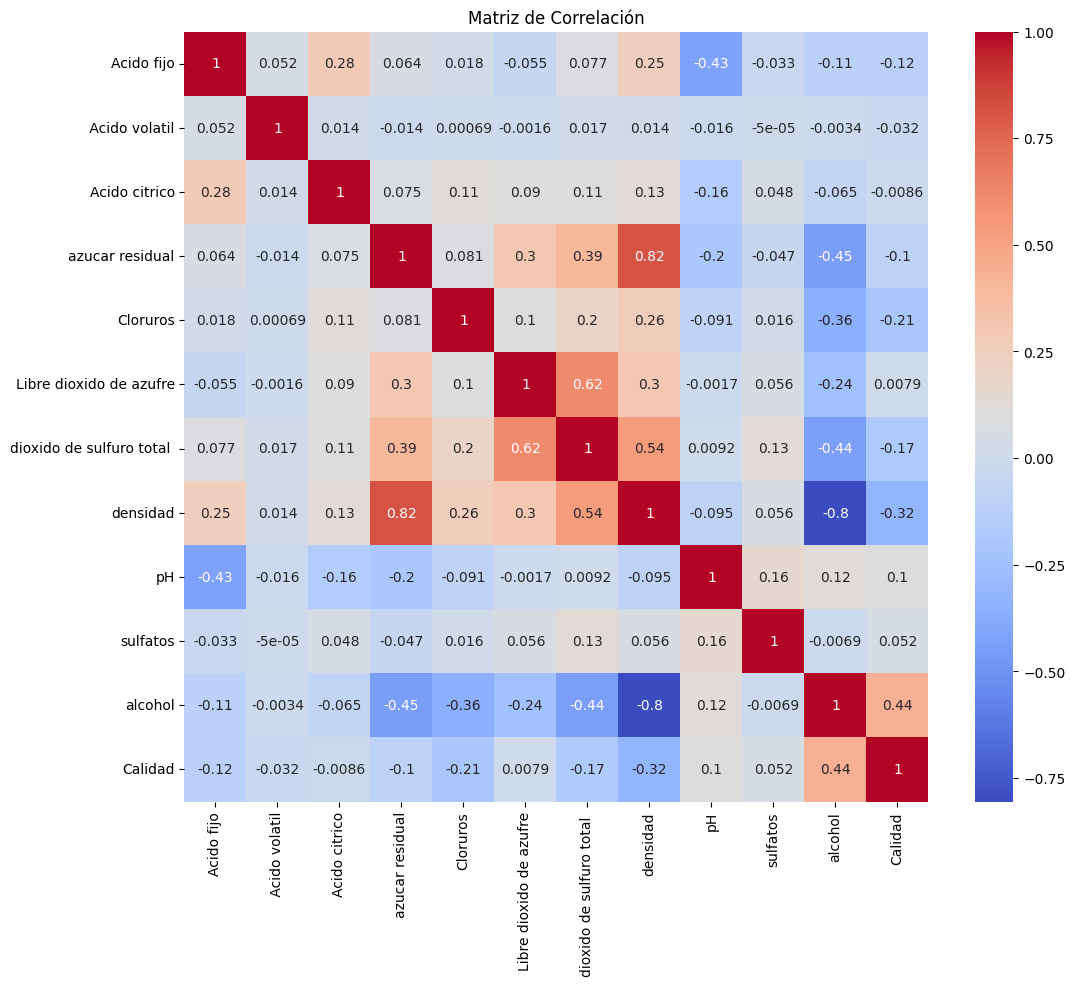

In [ ]:
matrizcorrelacion=df.corr()
# crear mapa de calor
plt.figure(figsize=(12, 10))  # con una matriz de 12*10
sns.heatmap(matrizcorrelacion,cmap='coolwarm',annot=True)
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
df.describe() #Estadisticos descriptivos

,Acido fijo,Acido volatil,Acido citrico,azucar residual,Cloruros,Libre dioxido de azufre,dioxido de sulfuro total,densidad,pH,sulfatos,alcohol,Calidad
count,4811.000000,4811.000000,4811.000000,4811.000000,4811.000000,4811.000000,4811.000000,4811.000000,4811.000000,4811.000000,4811.000000,4811.000000
mean,6.848462,0.486897,0.333303,6.262399,0.045702,35.167013,137.836313,0.993951,3.188707,0.488481,10.526868,5.878404
std,0.837103,14.485669,0.120466,4.873004,0.021972,16.971972,42.240640,0.002834,0.151060,0.113119,1.227497,0.887411
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991700,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.100000,0.043000,34.000000,134.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.700000,0.050000,46.000000,166.500000,0.996000,3.280000,0.550000,11.400000,6.000000
max,14.200000,1005.000000,1.660000,22.600000,0.346000,289.000000,440.000000,1.000000,3.820000,1.080000,14.200000,9.000000


In [ ]:
df.count()

,0
Acido fijo,4811
Acido volatil,4811
Acido citrico,4811
azucar residual,4811
Cloruros,4811
Libre dioxido de azufre,4811
dioxido de sulfuro total,4811
densidad,4811
pH,4811
sulfatos,4811


# Se preparan y se dividen los datos en conjuntos de entrenamiento y prueba. Se evalúan diferentes modelos de aprendizaje automático, como Regresión Lineal, KNN, Árbol de Decisión y Bosque Aleatorio, para determinar cuál se ajusta mejor a los datos y ofrece la mejor predicción de la calidad del vino.


In [ ]:
#Separamos nuestros datos en conjunto de entrenamiento y validación se entrenan todas menos calidad.
#La columna que se trata de predecir es calidad

x = df.drop(columns=['Calidad'])
y= df['Calidad']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)






In [ ]:
#Entrenamos diferentes modelos para ver cual es el que predice mejor la calidad del vino

modelos = {
    "Regresión lineal": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Árbol de decisión": DecisionTreeRegressor(),
    "Bosque aleatorio": RandomForestRegressor()
}


for nombre_modelo, modelo in modelos.items():
  pipeline = Pipeline([
        ('scaler', MinMaxScaler()), #Normalizamos los datos
        ('regressor', modelo)
    ])

  pipeline.fit(x_train, y_train)
  y_pred = pipeline.predict(x_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)


  print(f"Modelo: {nombre_modelo}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")
  print()

Modelo: Regresión lineal
Mean Squared Error: 0.5838220275665659
R-squared: 0.22746990048716142

Modelo: KNN
Mean Squared Error: 0.5450051921079959
R-squared: 0.27883345366546897

Modelo: Árbol de decisión
Mean Squared Error: 0.6915887850467289
R-squared: 0.08486982726393244

Modelo: Bosque aleatorio
Mean Squared Error: 0.37631308411214953
R-squared: 0.5020517031039983



# Creamos el data frame con los datos predichos y los guardamos en un csv con el fin de extraer un dato especifico de la calidad.

In [ ]:
# Ajustamos una regresion mediante Bosques Aleatorios para predecir la calidad del vino
# de los mejores para buscar un promedio

x = df.drop(columns=['Calidad'])
y = df['Calidad']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', RandomForestRegressor())
])

pipeline.fit(x_train, y_train)


y_pred = pipeline.predict(x_test)

# Crear el data frame con los datos predichos
predictions_df = pd.DataFrame({'Calidad_Predicha': y_pred}, index=x_test.index)

# Guardamos en un csv con indice

predictions_df.to_csv('predicciones_calidad.csv')
print(predictions_df)


      Calidad_Predicha
1448              6.08
2934              6.87
794               5.56
1029              5.75
8                 5.59
...                ...
2805              6.26
198               5.08
4012              6.93
1488              6.78
402               5.06

[963 rows x 1 columns]


# Se realiza una exploración de los hiperparámetros del modelo de Bosque Aleatorio. Esto implica ajustar los parámetros internos del modelo para mejorar aún más su precisión y rendimiento


In [ ]:
# Define la grilla de hiperparámetros a explorar
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
    }
#Crear el GridsearchCV
grid_search = GridSearchCV(pipeline, param_grid,scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtén el mejor modelo
best_model = grid_search.best_estimator_


Mejores hiperparámetros: {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}


# Guardamos el modelo para poder usarlo mas adelante

In [ ]:
filename = 'best_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file) #best_model es el mejor modelo entrenado mediante random forest

In [ ]:
prediccion = best_model.predict(x_test)
print(f'R2: {r2_score(y_test, prediccion)}')
print(f'MSE: {mean_squared_error(y_test, prediccion)}')



R2: 0.5023826858703437
MSE: 0.3760629514249452


# Se busca calcular el promedio de calidad, arrojando un numero especifico para una mejor lectura.

In [ ]:


average_calidad_predicha = predictions_df['Calidad_Predicha'].mean()
print(f"Average Predicted Quality: {average_calidad_predicha}")

Average Predicted Quality: 5.861775700934579


# Conclusion : Como resultado final de este proyecto determinamos que tras el análisis y la predicción realizada con el modelo de Bosque Aleatorio, se ha encontrado que la calidad promedio del vino se sitúa en 5.8.
# Este valor, dentro de una escala típica de calidad de vinos, representa una calidad aceptable, pero con margen de mejora. Si bien no se trata de un vino de baja calidad, tampoco alcanza los niveles de excelencia que se buscan en vinos de alta gama.

***Javier Navarro, Sebastian Morales, Claudio Britos***